# Credit Card Dataset for Clustering

Disponível em: https://www.kaggle.com/arjunbhasin2013/ccdata

Este estudo de caso exige desenvolver um modelo para identificar segmentações de clientes com o objetivo de definir uma estratégia de marketing.

## Sumário

1.	Análise Exploratória de Dados<br>
&emsp;1.1.	Check missing values<br>
&emsp;1.2.	Impute missing values with the most frequent term of the columns<br>
&emsp;1.3.	Sumário estatístico<br>
&emsp;1.4.	Correlação de features<br>
&emsp;1.5.	Distribuição dos Dados<br>
2.	Normalização dos dados<br>
3.	Elbow method<br>
4.	Treinamento do Modelo KMEANS<br>
5.	Interpretação dos Resultados<br>
&emsp;5.1.	Identificação dos grupos<br>
&emsp;5.2.	Resultados estatísticos<br>
&emsp;5.3.	Visualização dos Resultados<br>
6.	Conclusão

In [1]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv', thousands=',', decimal='.')

## 1. Análise Exploratória de Dados

Descrição das colunas:

* __CUST_ID__: Identification of Credit Card holder (Categorical)
* __BALANCE__: Balance amount left in their account to make purchases
* __BALANCE_FREQUENCY__: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* __PURCHASES__: Amount of purchases made from account 
* __ONEOFF_PURCHASES__: Maximum purchase amount done in one-go 
* __INSTALLMENTS_PURCHASES__: Amount of purchase done in installment
* __CASH_ADVANCE__: Cash in advance given by the user 
* __PURCHASES_FREQUENCY__: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* __ONEOFFPURCHASESFREQUENCY__: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* __PURCHASESINSTALLMENTSFREQUENCY__: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
* __CASHADVANCEFREQUENCY__: How frequently the cash in advance being paid
* __CASHADVANCETRX__: Number of Transactions made with "Cash in Advanced"
* __PURCHASES_TRX__: Number of purchase transactions made
* __CREDIT_LIMIT__: Limit of Credit Card for user
* __PAYMENTS__: Amount of Payment done by user
* __MINIMUM_PAYMENTS__: Minimum amount of payments made by user 
* __PRCFULLPAYMENT__: Percent of full payment paid by user 
* __TENURE__: Tenure of credit card service for user

In [2]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 1.1. Check missing values

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### 1.2. Impute missing values with the most frequent term of the columns

In [4]:
from sklearn.impute import SimpleImputer

type_dicio = dict(zip(df.dtypes.index, df.dtypes.values))
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns).astype(type_dicio)

### 1.3. Sumário estatístico

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.452407,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.897280,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,299.351881,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 1.4. Correlação de features
Neste notebook utilizaremos as features com fortes correlações.

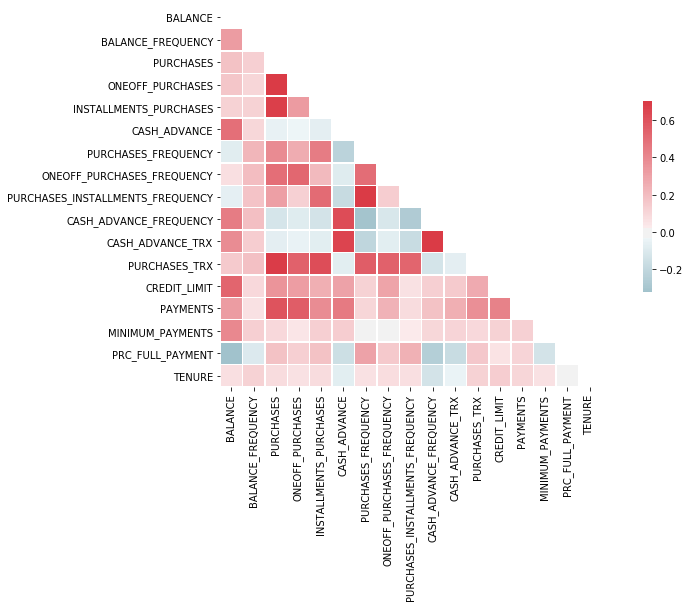

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 7))

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, vmax=0.7, cmap=cmap, mask=mask, center=0, square=True, linewidths=.5, cbar_kws={'shrink':.5})

### 1.5. Distribuição dos Dados

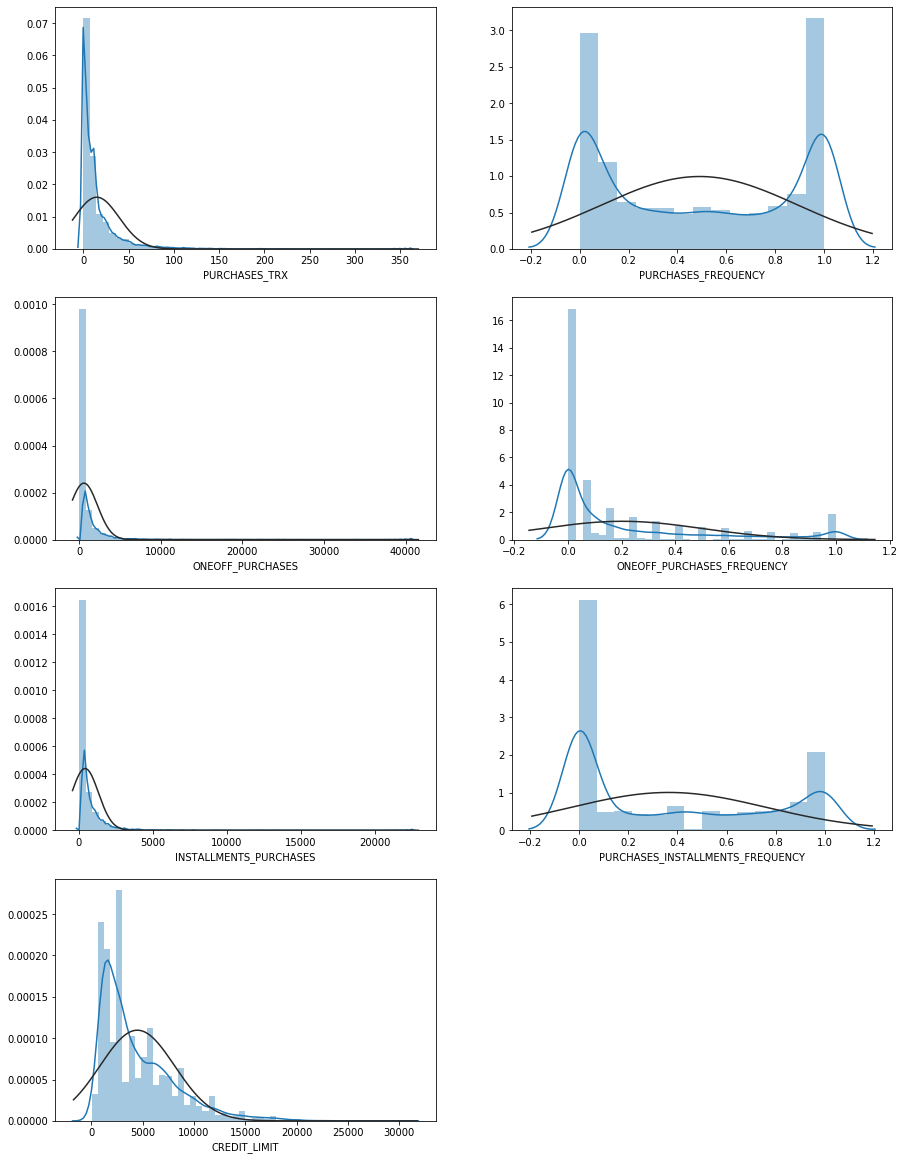

In [7]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

features = ['PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CREDIT_LIMIT']

fig = plt.figure(figsize=(15, 90))
nrows = len(df.columns[1:])
ncols = 2

for index, feature in enumerate(df[features]):
    ax = fig.add_subplot(nrows, ncols, index + 1)
    sns.distplot(df[feature], ax=ax, fit=stats.norm)
    
# df[df.columns[1:]].plot(kind='density', subplots=True, layout=(nrows, ncols), sharex=False, figsize=(15, 90))
# plt.show()

## 2. Normalização dos dados
Aplica os dados em uma escala com range entre 0 e 1.

In [8]:
from sklearn.preprocessing import MinMaxScaler

X = df[features].values

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(X), columns=df[features].columns)

## 3. Elbow method

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from numpy import ndarray


def elbow(base=None, random=0, range_final=30):
    if base is None:
        raise Exception('You must inform the "base" parameter.')

    if not isinstance(base, ndarray):
        raise Exception('"base" parameter must be numpy.ndarray')
    
    # Size of the plot
    figure(figsize=(15, 5))

    # Elbow
    wcss = []
    for i in range(1, range_final):
        kmeans = KMeans(n_clusters=i, random_state=random)
        kmeans.fit(base)
        wcss.append(kmeans.inertia_)

    # Plot
    plt.plot(wcss, 'ro-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.grid()
    plt.show()

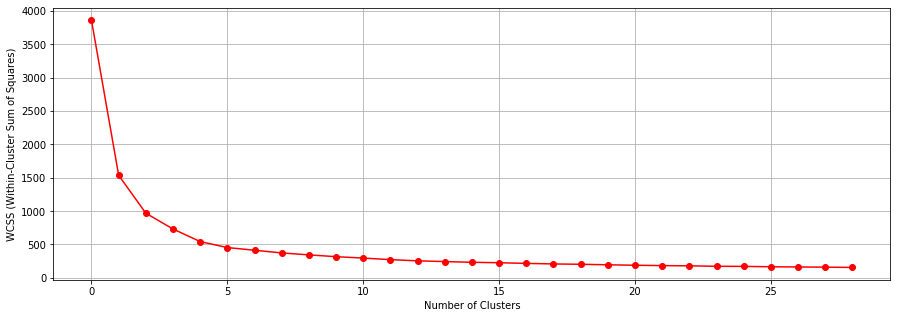

In [10]:
elbow(df_normalized.values)

## 4. Treinamento do Modelo KMEANS

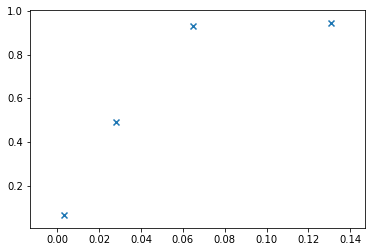

In [11]:
import pickle

features = ['PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CREDIT_LIMIT']

# Treinamento do modelo
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_normalized[features].values)

# Previsões
previsores = kmeans.predict(df_normalized[features])
df['kmeans'] = previsores

# Visualização dos centroides
centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x')

# Salva o modelo
arquivo = 'modelo_kmeans.sav'
pickle.dump(kmeans, open(arquivo, 'wb'))

## 5. Interpretação dos Resultados
### 5.1. Identificação dos grupos
Para cada grupo do kmeans, calculamos a média de cada feature e aplicamos 5 categorias de perfil de usuário. Valores entre:
* 0 a 19% - Baixo
* 20 a 39% - Moderado-Baixo
* 40 a 59% - Moderado
* 60 a 79% - Moderado-Alto
* 80 a 100% - Alto

In [12]:
features = ['CREDIT_LIMIT', 'PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']

df_grupoby_kmeans = df.groupby('kmeans')[features].mean()
df_grupoby_kmeans_label = pd.DataFrame()

for feature in features:
    min_value = df_grupoby_kmeans[feature].min() - 10000
    max_value = df_grupoby_kmeans[feature].max()
    
    df_grupoby_kmeans_label[feature] = pd.cut(df_grupoby_kmeans[feature], bins=[min_value, max_value * .2, max_value * .4, max_value * .6, max_value * .8, max_value + 1], labels=['Baixo',  'Moderado-Baixo', 'Moderado',  'Moderado-Alto', 'Alto'], right=False) 

In [13]:
df_grupoby_kmeans

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES_FREQUENCY,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY
kmeans,,,,,,,
0,6995.966145,46.794680,0.944487,2571.042727,0.848782,908.564988,0.542560
1,4067.931992,1.148855,0.065213,151.071472,0.046581,16.623097,0.017493
2,3935.421008,23.251862,0.931783,292.555506,0.103338,875.930574,0.890014
3,4399.743960,10.056236,0.493296,549.730340,0.213881,292.499287,0.285605


In [14]:
df_grupoby_kmeans_label

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES_FREQUENCY,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY
kmeans,,,,,,,
0,Alto,Alto,Alto,Alto,Alto,Alto,Moderado-Alto
1,Moderado,Baixo,Baixo,Baixo,Baixo,Baixo,Baixo
2,Moderado,Moderado,Alto,Baixo,Baixo,Alto,Alto
3,Moderado-Alto,Moderado-Baixo,Moderado,Moderado-Baixo,Moderado-Baixo,Moderado-Baixo,Moderado-Baixo


### 5.2. Resultados estatísticos

In [15]:
def porcentagem(series):
    total_rows = len(df)
    decimals = 2
    return round(series.count() / total_rows * 100, decimals)

features = ['CREDIT_LIMIT', 'PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'kmeans']
df[features].groupby('kmeans').agg(['mean', 'median', 'std', 'count', porcentagem]).stack()

CREDIT_LIMIT  PURCHASES_TRX  PURCHASES_FREQUENCY  \
kmeans                                                                 
0      mean          6995.966145      46.794680             0.944487   
       median        6500.000000      34.000000             1.000000   
       std           4366.668342      41.156435             0.087104   
       count         1203.000000    1203.000000          1203.000000   
       porcentagem     13.440000      13.440000            13.440000   
1      mean          4067.931992       1.148855             0.065213   
       median        3000.000000       0.000000             0.000000   
       std           3279.308059       2.196802             0.085769   
       count         3668.000000    3668.000000          3668.000000   
       porcentagem     40.980000      40.980000            40.980000   
2      mean          3935.421008      23.251862             0.931783   
       median        3000.000000      15.000000             1.000000   
       std           3239.918482      23.218395             0.100079   
       count         2283.000000    2283.000000          2283.000000   
       porcentagem     25.510000      25.510000            25.510000   
3      mean          4399.743960      10.056236             0.493296   
       median        3000.000000       8.000000             0.500000   
       std           3598.946343       8.419943             0.122105   
       count         1796.000000    1796.000000          1796.000000   
       porcentagem     20.070000      20.070000            20.070000   

                    ONEOFF_PURCHASES  ONEOFF_PURCHASES_FREQUENCY  \
kmeans                                                             
0      mean              2571.042727                    0.848782   
       median            1624.500000                    0.916667   
       std               3460.557977                    0.159948   
       count             1203.000000                 1203.000000   
       porcentagem         13.440000                   13.440000   
1      mean               151.071472                    0.046581   
       median               0.000000                    0.000000   
       std                553.821896                    0.073222   
       count             3668.000000                 3668.000000   
       porcentagem         40.980000                   40.980000   
2      mean               292.555506                    0.103338   
       median               0.000000                    0.000000   
       std                634.638634                    0.154019   
       count             2283.000000                 2283.000000   
       porcentagem         25.510000                   25.510000   
3      mean               549.730340                    0.213881   
       median             220.805000                    0.166667   
       std               1200.152203                    0.207965   
       count             1796.000000                 1796.000000   
       porcentagem         20.070000                   20.070000   

                    INSTALLMENTS_PURCHASES  PURCHASES_INSTALLMENTS_FREQUENCY  
kmeans                                                                        
0      mean                     908.564988                          0.542560  
       median                   461.680000                          0.583333  
       std                     1463.769061                          0.381319  
       count                   1203.000000                       1203.000000  
       porcentagem               13.440000                         13.440000  
1      mean                      16.623097                          0.017493  
       median                     0.000000                          0.000000  
       std                       85.842818                          0.051189  
       count                   3668.000000                       3668.000000  
       porcentagem               40.980000                         40

### 5.3. Visualização dos Resultados

C:\Users\hudso\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hudso\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


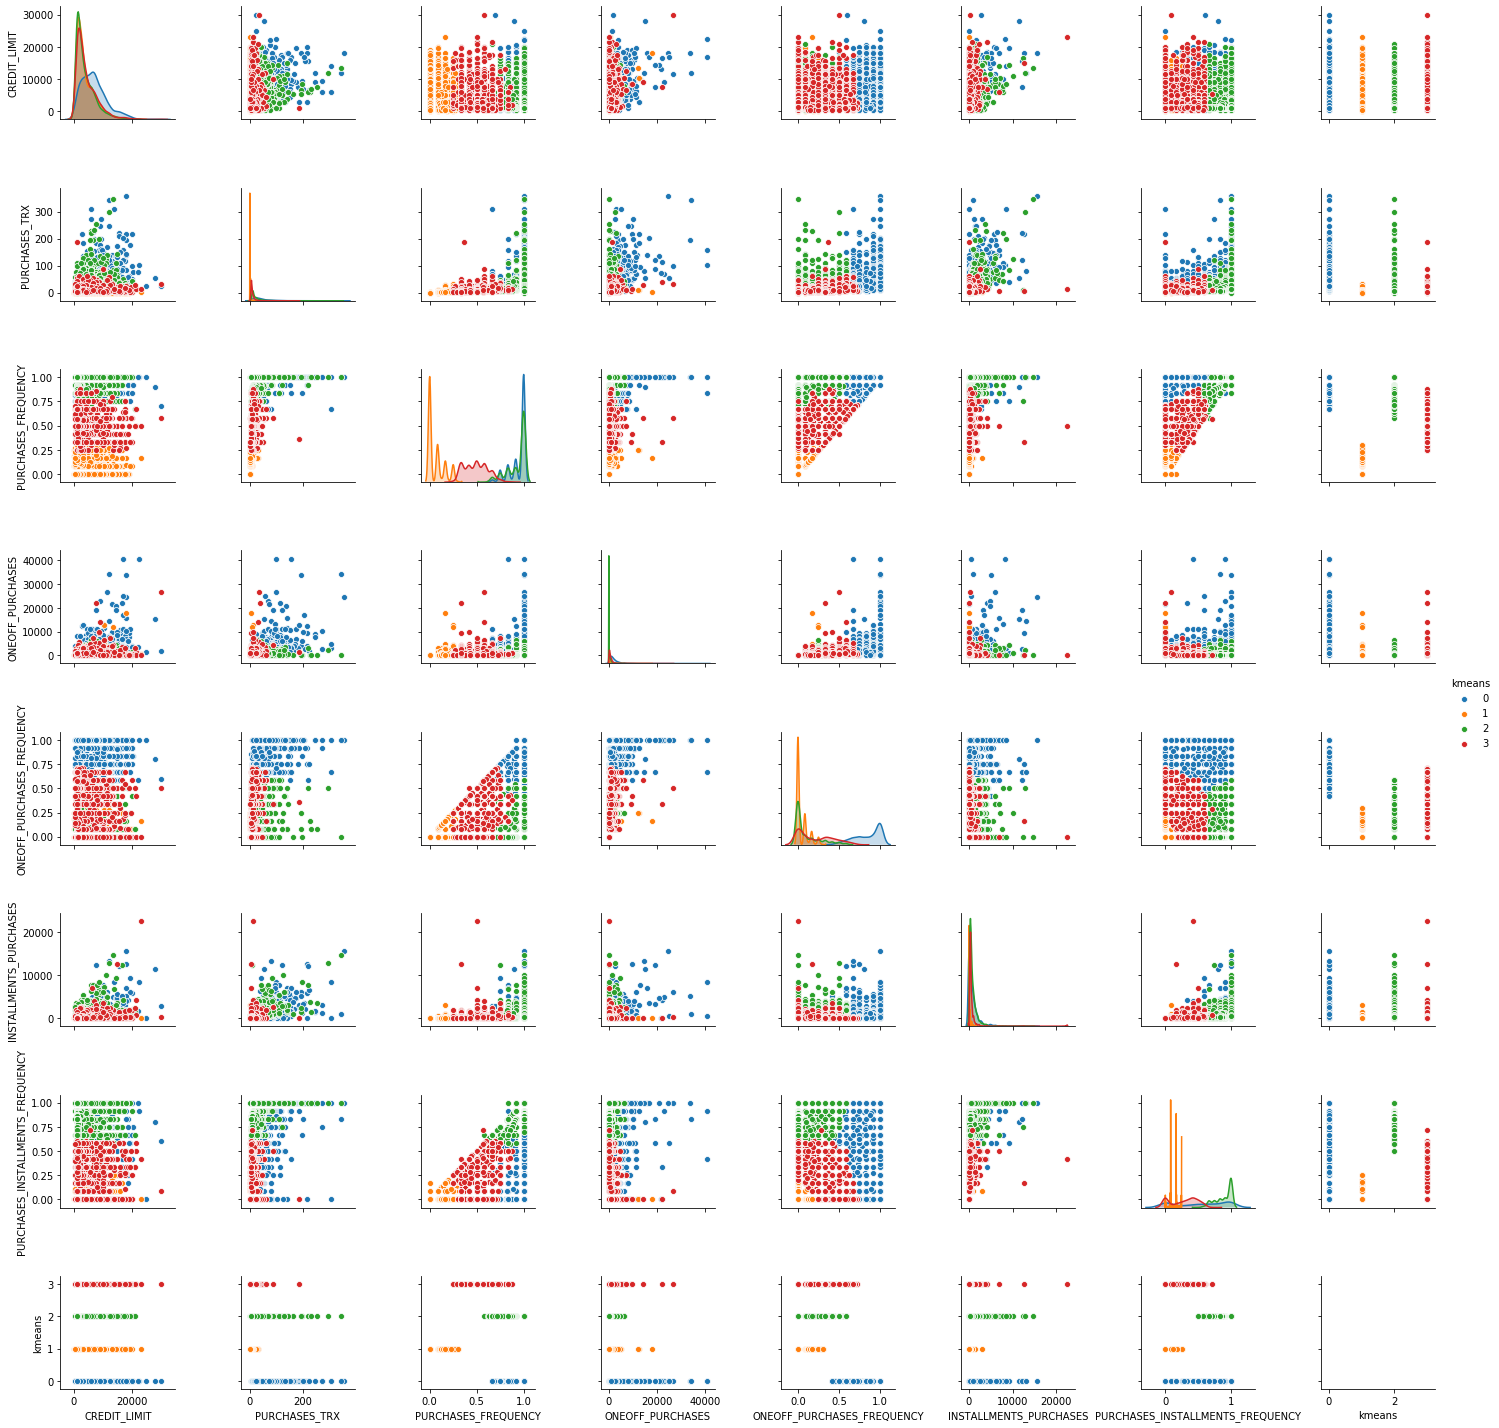

In [16]:
features = ['CREDIT_LIMIT', 'PURCHASES_TRX', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'kmeans']
sns.pairplot(df[features], hue='kmeans')

## 6. Conclusão
__Grupo 0:__
* __1203 usuários ativos (13,44%): realizam compras-únicas e também parcelam frequentemente__


* Possui um limite de crédito __alto__
* Realiza compras com __alta__ frequência
* Realiza compras-únicas com __alta__ frequência
* Realiza compras parceladas com __alta__ frequência

__Grupo 1:__
* __3668  usuários conservadores (40, 98%): compram pouco__


* Possui um limite de crédito __moderado__
* Realiza compras com __baixa__ frequência
* Realiza compras-únicas com __baixa__ frequência
* Realiza compras parceladas com __baixa__ frequência

__Grupo 2:__
* __2283 usuários ativos (25,51%): compram com frequência e parcelam__


* Possui um limite de crédito __moderado__
* Realiza compras com __alta__ frequência
* Realiza compras-únicas com __baixa__ frequência
* Realiza compras parceladas com __alta__ frequência

__Grupo 3:__
* __1796 usuários conservadores (20,07%): compram moderadamente__


* Possui um limite de crédito __moderado-alto__ 
* Realiza compras com uma frequência __moderada__
* Realiza compras-únicas com uma frequência __moderada-baixa__
* Realiza compras parceladas com uma frequência __moderada-baixa__